In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [157]:
df = pd.read_csv('result_s4.csv', header = None)

In [262]:
##Cet

cet = pd.read_csv('result_cet.csv', header = None)
id = []
HS200 = []
for i in range(len(cet.index)) :
    x, y = cet[0][i].split(" ")
    id.append(x)
    HS200.append(y)
cet['ID'] = pd.Series(id).values
cet['HS200'] = pd.Series(HS200).values
cet

TVE17 = cet.ID.str.contains('^TVE17')
LTVE17 = cet.ID.str.contains('^LTVE17')
IDK17 = cet.ID.str.contains('^IDK17')
WYD17 = cet.ID.str.contains('^WYD17')


cet = cet[TVE17 | LTVE17 | IDK17 | WYD17]

for i in cet.index.values :
    cet.loc[i][1] = cet.loc[i][1].strip().replace('MA202(','').replace(')','')

cet = cet[1]

cet = cet.astype('category', categories = ['Absent','F','P','C','C+','B','B+','A','A+','O'],ordered=True)




##cet code ends

c:\users\abi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [158]:
id = []
HS200 = []
for i in range(len(df.index)) :
    x, y = df[0][i].split(" ")
    id.append(x)
    HS200.append(y)

In [159]:
df = df.drop(0 , axis=1)

In [160]:
df['ID'] = pd.Series(id).values
df['HS200'] = pd.Series(HS200).values

In [64]:
#df = df.drop(df.index[[-3,-2]])

In [161]:
pkd17 = df.ID.str.contains('^PKD17')
LPKD17 = df.ID.str.contains('^LPKD17')
IDK17 = df.ID.str.contains('^IDK17')
WYD17 = df.ID.str.contains('^WYD17')

In [162]:
df = df[pkd17 | LPKD17 |IDK17 | WYD17 ]

In [163]:
for i in df.index.values :
    df.loc[i][0] = df.loc[i][0].strip().replace('MA202(','').replace(')','')

In [164]:
df.columns = ['MA202', 'CS202', 'CS204', 'CS206', 'CS232', 'CS208', 'CS234', 'ID', 'HS200']

In [165]:
for i in df.index.values :
    df.loc[i]['HS200'] = df.loc[i]['HS200'].strip().replace('HS200(','').replace(')','')


In [166]:
df = df.set_index('ID')

In [167]:
df.to_csv('clean_result.csv')

In [177]:
df1 = pd.read_csv('clean_result.csv')
df2 = pd.read_csv('clean_mech.csv')

In [176]:
df1.shape

(67, 9)

In [178]:
df1['MA202'] = df1['MA202'].astype('category', categories = ['Absent','F','P','C','C+','B','B+','A','A+','O'],ordered=True)
df2['MA202'] = df2['MA202'].astype('category', categories = ['Absent','F','P','C','C+','B','B+','A','A+','O'],ordered=True)

c:\users\abi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
c:\users\abi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [263]:
x = df1['MA202'].value_counts(sort=False)
mex = df2['MA202'].value_counts(sort=False)
cetx = cet.value_counts(sort=False)

In [217]:
grades = ['Absent','F','P','C','C+','B','B+','A','A+','O']
y_pos = np.arange(len(grades))
plt.figure()
bars = plt.bar(y_pos, x, align='center', color='lightslategrey')
plt.xticks(y_pos, grades)
plt.ylabel('Count')
plt.title('Distribution of MA202')
for bar in bars :
    if int(bar.get_height())!= 0:
        plt.gca().text(bar.get_x()+ bar.get_width()/2, bar.get_height()-.77, str(int(bar.get_height())), ha='center', color='w',fontsize=11)
%matplotlib inline

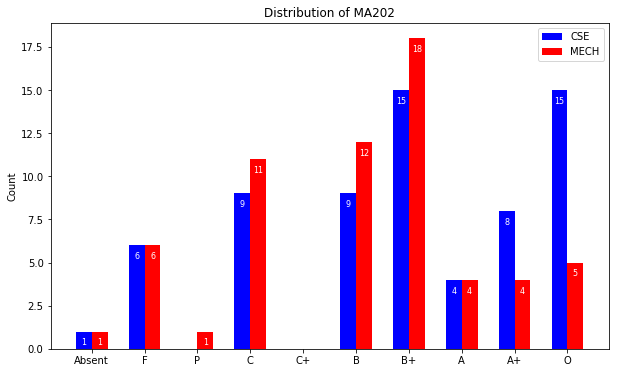

<Figure size 960x1440 with 0 Axes>

In [235]:
plt.rcParams['figure.figsize'] = (10,6)
grades = ['Absent','F','P','C','C+','B','B+','A','A+','O']
y_pos = np.arange(len(grades))
plt.figure()

ax = plt.subplot(111)
bars1 = ax.bar(y_pos-0.3/2, x, width=0.3,color='b', align='center')
bars2 = ax.bar(y_pos+0.3/2, mex, width=0.3,color='r', align='center')
plt.xticks(y_pos, grades)
plt.ylabel('Count')
plt.title('Distribution of MA202')


for bar in bars1 :
    if int(bar.get_height())!= 0:
        plt.gca().text(bar.get_x()+ bar.get_width()/2, bar.get_height()-.77, str(int(bar.get_height())), ha='center', color='w',fontsize=8)
for bar in bars2 :
    if int(bar.get_height())!= 0:
        plt.gca().text(bar.get_x()+ bar.get_width()/2, bar.get_height()-.77, str(int(bar.get_height())), ha='center', color='w',fontsize=8)
ax.legend((bars1[0],bars2[0]),('CSE',"MECH"))
figure(num=None, figsize=(12, 18), dpi=80, facecolor='w', edgecolor='k')
plt.show()

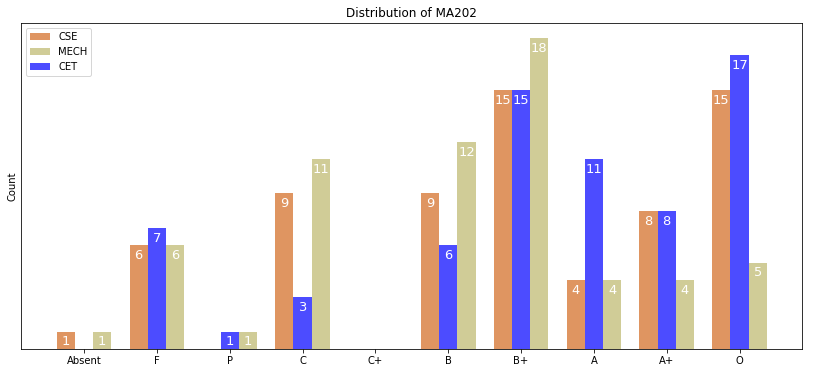

In [267]:
plt.rcParams['figure.figsize'] = (14,6)



grades = ['Absent','F','P','C','C+','B','B+','A','A+','O']
y_pos = np.arange(0,len(grades)*2,2)
plt.figure()

ax = plt.subplot(111)
cet1 = ax.bar(y_pos, cetx, width=0.5,color='b', align='center', alpha=0.7)
bars3 = ax.bar(y_pos-0.5, x, width=0.5,color='chocolate', align='center', alpha=0.7)
bars4 = ax.bar(y_pos+0.5, mex, width=0.5,color='darkkhaki', align='center',alpha=0.7)
plt.xticks(y_pos, grades)
plt.ylabel('Count')
plt.title('Distribution of MA202')

def add_text_above_bar(bars) :
    for bar in bars :
        if int(bar.get_height())!= 0:
            plt.gca().text(bar.get_x()+ bar.get_width()/2, bar.get_height()-.77, str(int(bar.get_height())), ha='center', color='w',fontsize=13)

add_text_above_bar(bars3)
add_text_above_bar(bars4)
add_text_above_bar(cet1)
        
        
ax.legend((bars3[0],bars4[0],cet1[0]),('CSE',"MECH",'CET'))

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False, labelleft=False)         # ticks along the top edge are off

plt.savefig('MA202_withcet.png')
#figure(num=None, figsize=(12, 18), dpi=80, facecolor='w', edgecolor='k')
plt.show()

In [213]:
np.arange(0,len(grades)*2,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])